In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import re
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import os

# Chargement de la base Sentiment140 préprocessée 

In [3]:
STOP_WORDS = True
LEMMATIZATION = True
file = "train"
if STOP_WORDS:
    file += "_stop"
if LEMMATIZATION:
    file += "_lemm"
df = pd.read_pickle(os.path.join("data", "sentiment140", file+".bz2"))

In [4]:
df = df.sample(50000, random_state=1234)
df.sentiment = df.sentiment.apply(lambda x: 'Negative' if x == 0 else 'Positive')
df

# Count Vectorizer

In [58]:
vectorizer = CountVectorizer(min_df=0.001)


X = df.text.to_list()
Y = df.sentiment.to_list()

X_vec = vectorizer.fit_transform(X).toarray()

In [22]:
X_train, X_test, y_train, y_test  = train_test_split(
        X_vec, 
        Y,
        train_size=0.80,
        random_state=1234)

In [25]:
def conf_matrix(y_pred, y_test, model):
    sc_accuracy = sklearn.metrics.accuracy_score(y_pred, y_test)
    sc_f1 = sklearn.metrics.f1_score(y_pred, y_test, pos_label="Positive")
    sc_recall = sklearn.metrics.recall_score(y_pred, y_test, pos_label="Positive")
    sc_precision = sklearn.metrics.precision_score(y_pred, y_test, pos_label="Positive")

    sklearn.metrics.plot_confusion_matrix(model, X_test, y_test)
    plt.show()

    print(f"Accuracy : {sc_accuracy}")
    print(f"Recall : {sc_recall}")
    print(f"Precision : {sc_precision}")
    print(f"F1 : {sc_f1}")

# Gaussian Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB

gauss = GaussianNB()
gauss.fit(X_train, y_train)
y_pred = gauss.predict(X_test)

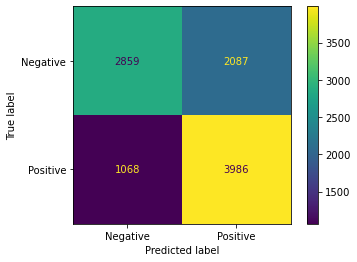

Accuracy : 0.6845
Recall : 0.6563477688127779
Precision : 0.7886822318955283
F1 : 0.7164554686797878


In [35]:
conf_matrix(y_pred, y_test, gauss)

In [36]:
# Fit to data and predict using pipelined scaling, GNB.
gauss = make_pipeline(StandardScaler(), GaussianNB())
gauss.fit(X_train, y_train)
y_pred = gauss.predict(X_test)

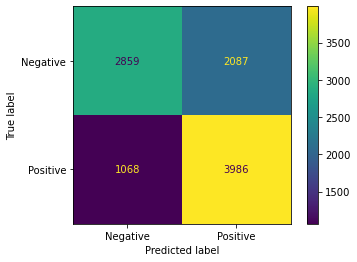

Accuracy : 0.6845
Recall : 0.6563477688127779
Precision : 0.7886822318955283
F1 : 0.7164554686797878


In [37]:
conf_matrix(y_pred, y_test, gauss)

# Naive Bayes using TD IDF

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [61]:
#Création du TD IDF Vectorizer
vectorizer2 = TfidfVectorizer(min_df=0.001)
vectorizer2.fit_transform(df.text)

<50000x1051 sparse matrix of type '<class 'numpy.float64'>'
	with 454479 stored elements in Compressed Sparse Row format>

In [66]:
X_vec2 = vectorizer2.fit_transform(X).toarray()

X_train2, X_test2, y_train2, y_test2  = train_test_split(
        X_vec2, 
        Y,
        train_size=0.80,
        random_state=1234)

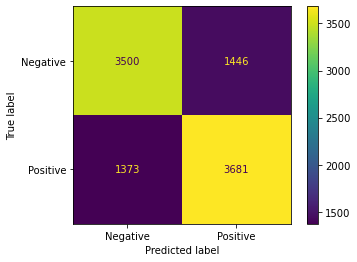

Accuracy : 0.7006
Recall : 0.6885756133284511
Precision : 0.7441630391768896
F1 : 0.7152909851654622


In [69]:
#Utilisation du GaussianNB
gauss = GaussianNB()
gauss.fit(X_train2, y_train2)
y_pred2_gauss = gauss.predict(X_test2)
conf_matrix(y_pred2_gauss, y_test2, gauss)

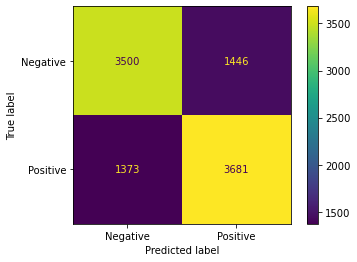

Accuracy : 0.7428
Recall : 0.7537832310838446
Precision : 0.7293233082706767
F1 : 0.7413515687851971


In [73]:
#Utilisation du MultinomialNB
multi = MultinomialNB(alpha=1) #par défaut alpha=1 : Laplace smoothing parameter
multi.fit(X_train2, y_train2)
y_pred2_multi = multi.predict(X_test2)
conf_matrix(y_pred2_multi,y_test2, gauss)